In [144]:
# import useful modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import time
import matplotlib.image as mpimg
random.seed(time.time())

In [145]:
# variables
filename = "starrynight"

In [146]:
modulus = np.loadtxt("problem.txt", dtype=np.float32)
imagedim = (len(modulus), len(modulus[0]))
print(imagedim)

(100, 100)


In [236]:
# projection onto image modulus constraint
def proj_c1(x):
    Fx = np.fft.fft2(x)
    for i in range(0,imagedim[0]):
        for j in range(0, imagedim[1]):
            if np.abs(Fx[i][j]) < 1e-6:
                Fx[i][j] = modulus[i][j]
            else:
                Fx[i][j] *= (modulus[i][j]/np.abs(Fx[i][j]))
    return np.fft.ifft2(Fx)

In [237]:
# projection onto real number & non-negativity constraint
def proj_c2(x):
    x = x.real
    x[x < 0] = 0
    return x

In [238]:
# define stopping condition (maybe will try some other ones later)
def stop_cond1(cnt):
    return (cnt < numiterations)

In [239]:
def showImage(x, title):
    img = np.array(x, dtype=float)
    plt.figure()
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)

# Algorithms

### Initial point (random?)

In [246]:
def initialPoint():
    x = np.array([[random.randint(0,255) for j in range(0,imagedim[1])] for i in range(0,imagedim[0])])
    #x = np.array([[255 for j in range(0,imagedim[1])] for i in range(0,imagedim[0])])
    #x = mpimg.imread(filename+"edited.png")*255
    showImage(x, "Initial image")
    return x

In [251]:
# Algorithm variables
numiterations = 100
displayperiod = 10

### 1) Error reduction algorithm

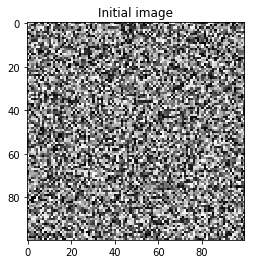

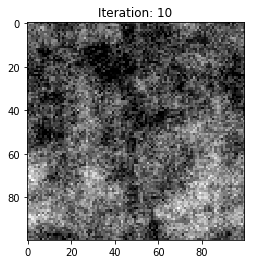

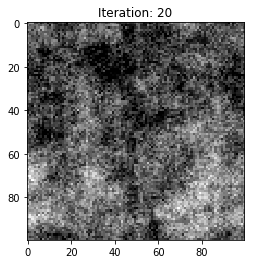

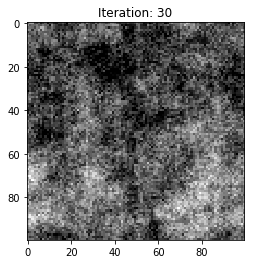

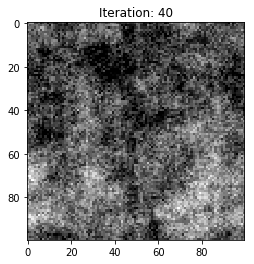

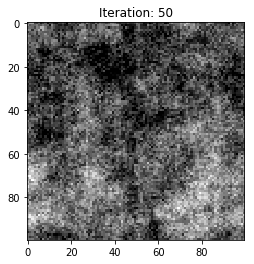

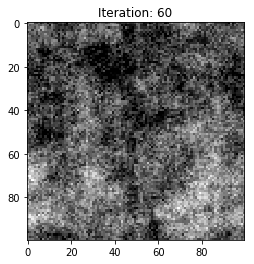

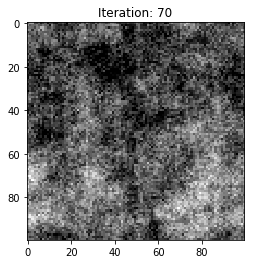

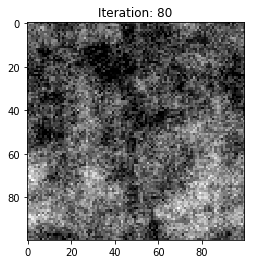

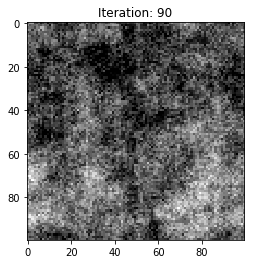

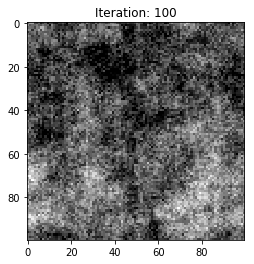

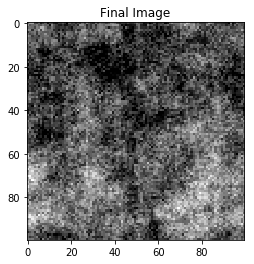

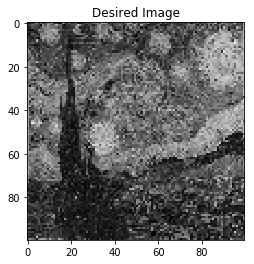

In [249]:
cnt = 0
x = initialPoint()
while(stop_cond1(cnt)):
    x = proj_c1(x)
    x = proj_c2(x)
    cnt += 1
    if(cnt%displayperiod == 0):
        showImage(x, "Iteration: " + str(cnt))
showImage(x, "Final Image")
img = mpimg.imread(filename+"edited.png")*255
showImage(img, "Desired Image")

### Fineup's BIO Algorithm

C:\Users\Netanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\Netanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':
C:\Users\Netanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in absolute
  
C:\Users\Netanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in absolute
  if __name__ == '__main__':
C:\Users\Netanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


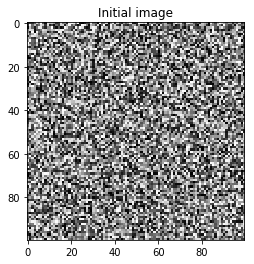

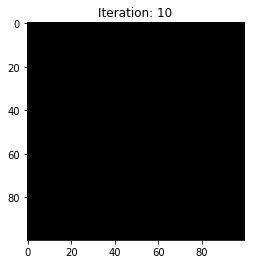

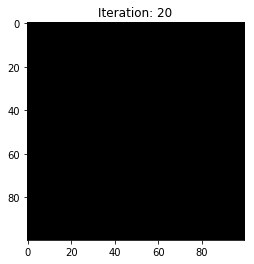

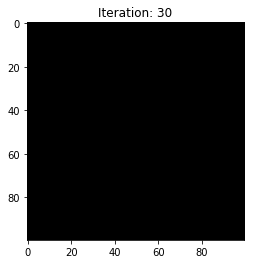

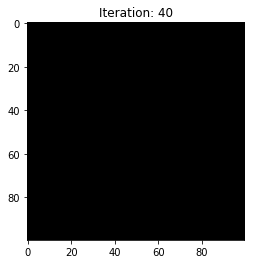

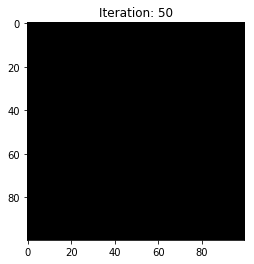

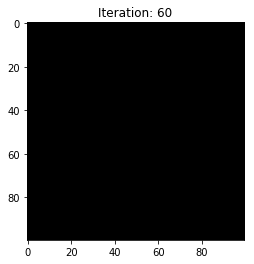

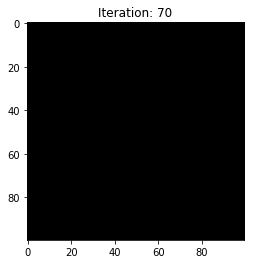

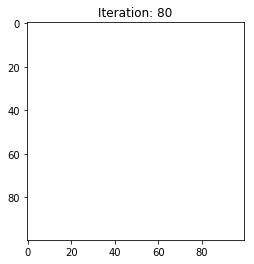

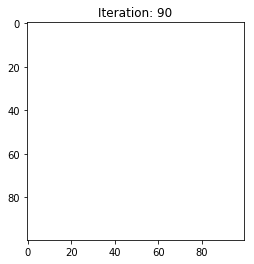

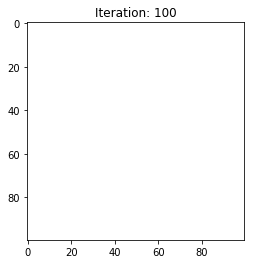

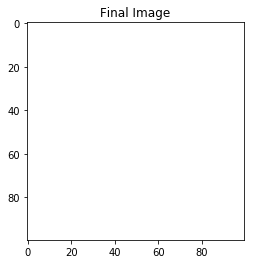

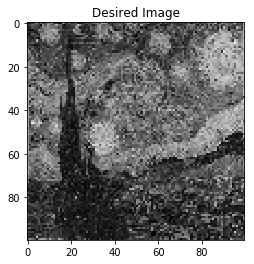

In [250]:
cnt = 0
x = initialPoint()
while(stop_cond1(cnt)):
    x = np.matmul(proj_c2(x),proj_c1(x))+x-proj_c1(x)
    cnt += 1
    if(cnt%displayperiod == 0):
        showImage(x, "Iteration: " + str(cnt))
showImage(x, "Final Image")
img = mpimg.imread(filename+"edited.png")*255
showImage(img, "Desired Image")

### Final results:

C:\Users\Netanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


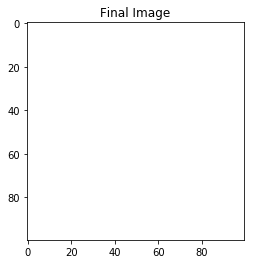

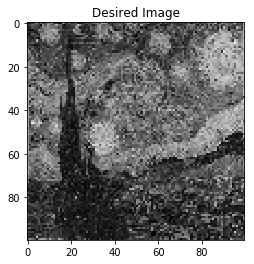

In [156]:
showImage(x, "Final Image")
img = mpimg.imread(filename+"edited.png")*255
showImage(img, "Desired Image")